In [1]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [5]:
df_clean = pd.read_csv('../datasets/clean_train_data.csv')


In [6]:
df_clean.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,totalLivingSF
0,109,533352170,60,RL,69.0483,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,130500,2204.0
1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2009,WD,220000,3035.0
2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,1,2010,WD,109000,2114.0
3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,174000,1828.0
4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,138500,2121.0


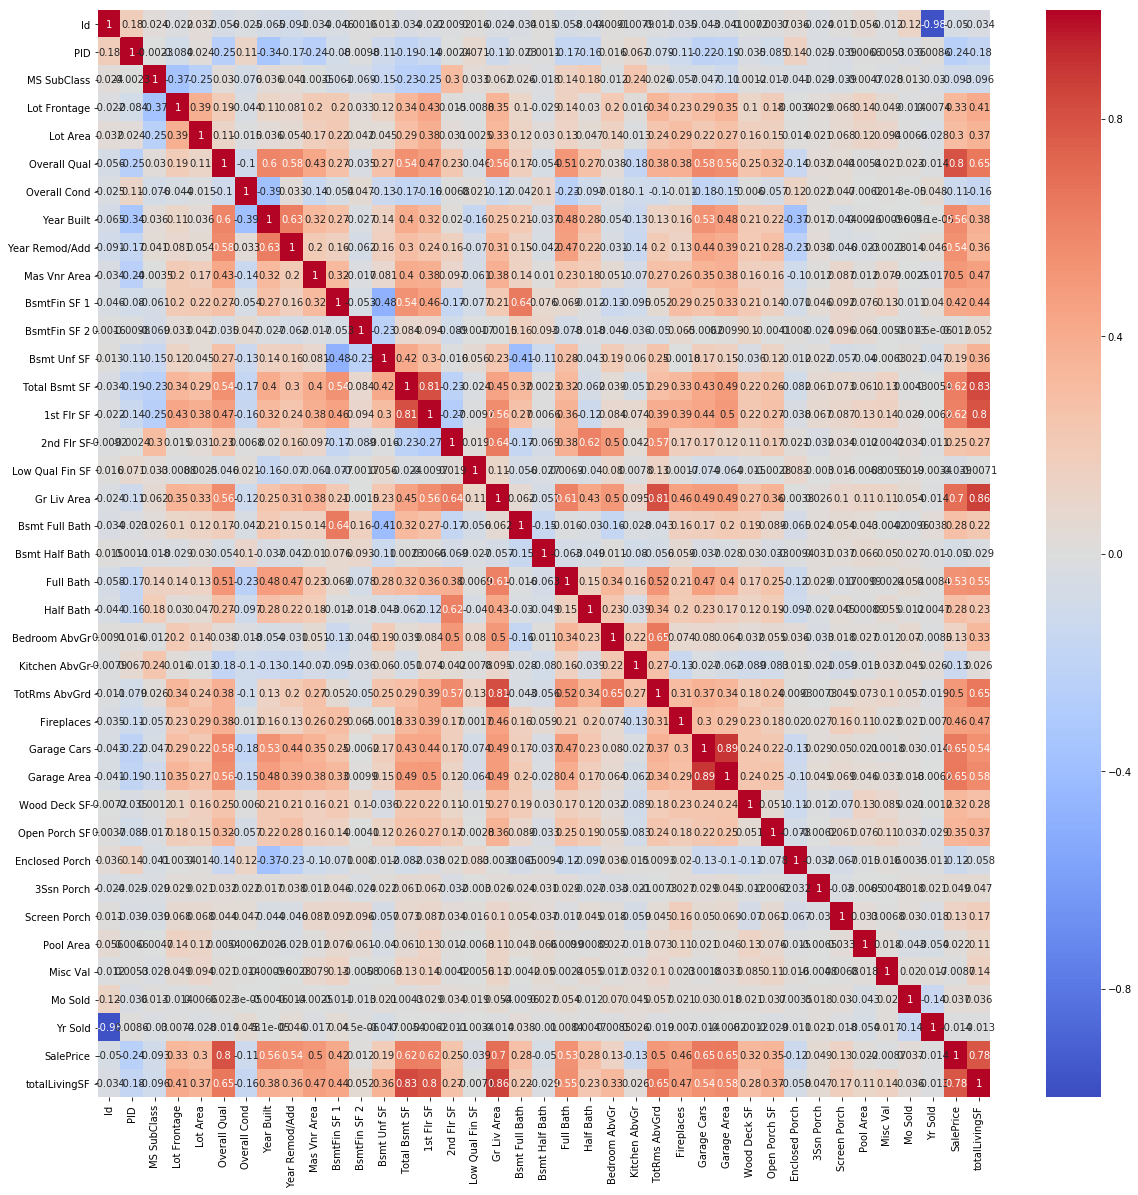

In [7]:
### a corr map that really doesnt help me out much. 
plt.figure(figsize=(20 ,20))
sns.heatmap(df_clean.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm');


In [8]:
df_clean.shape

(2028, 77)

In [10]:
#tgetting rid of anything thats not 'residential'
df_clean[df_clean['MS Zoning'] == 'C (all)']

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,totalLivingSF


In [11]:
df_clean['MS Zoning'].value_counts()

RL    1598
RM     315
FV     101
RH      14
Name: MS Zoning, dtype: int64

In [879]:
#df_clean['MS Zoning']= [x.strip('(call)') for x in df_clean['MS Zoning']]

In [12]:
nonResidential = ['C (all)','I (all)', 'A (agr)']
for each in nonResidential:
    df_clean = df_clean[df_clean['MS Zoning']!=each]
    print(each)

In [882]:
# # when ever i used the for loop it would turn the column into int64
# # so I had to go in and erase each non residential. 
# df_clean['MS Zoning'] = df_clean[df_clean['MS Zoning']!='nonResidential']

In [13]:
# checking to see that the loop did its thing
(df_clean[['MS Zoning']] == 'A (agr)').sum()

MS Zoning    0
dtype: int64

In [14]:
#nice little code i found on the stack site. 
moreThan80PercentGone = []
for each in df_clean.columns:
    if sum(df_clean[each].isnull())/len(df_clean) > 0.8:
        moreThan80PercentGone.append(each)
print(moreThan80PercentGone)

[]


In [886]:
# more than 80% of thier shit is missing. 
df_clean = df_clean.drop(moreThan80PercentGone,axis=1)

In [16]:
#morethan80 of columns were dropped. I dont have the skills or time to perfect this.
df_clean.shape

(2028, 77)

In [889]:
#df_clean[df_clean['BsmtFin Type 1'].isnull()]

In [18]:
# looking at how many nulls i have left in my data, fuck man!!
print(df_clean.isnull().sum().to_string())

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       1
BsmtFin Type 2     0
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bat

In [19]:
# ## print value counts for all 'objects' with more than 1 null value
# # re ran this column once i cleand up None or NaN values
# def object_vcs_and_nulls(df):
#     for i in df:
#         if df[i].dtype == 'object':
#             if df[i].isnull().sum() > 0:
#                 print(df[i].value_counts())  
#                 print("Number of Null Values: " + str(df[i].isnull().sum()))
#                 print("Percentage of Nulls = " + str(np.round((df[i].isnull().sum() / 14.60), 2)) + "%")
#                 print("\n")
      
# object_vcs_and_nulls(df_clean)

In [24]:
#df_clean.corr()['SalePrice'].sort_values(ascending=False)

In [894]:
# I can replace the None to the mode. just replace it with the brk
df_clean[['Mas Vnr Type']].dtypes

Mas Vnr Type    object
dtype: object

In [895]:
# replaced None and Nan values with BrkFace, I used same equation twice
df_clean['Mas Vnr Type'].replace('None', 'BrkFace', inplace=True)
df_clean['Mas Vnr Type'].fillna('None',inplace=True)
df_clean['Mas Vnr Type'].head()

0    BrkFace
1    BrkFace
2    BrkFace
3    BrkFace
4    BrkFace
Name: Mas Vnr Type, dtype: object

In [896]:
# cleaning
df_clean['Mas Vnr Area'].replace(np.nan, 0, inplace=True)

In [897]:
df_clean['Fireplace Qu'].fillna('None', inplace=True)
df_clean['Fireplace Qu'].isnull().sum()

0

In [898]:
#replaced all NaN with NA fireplaces. suggested  
df_clean['Garage Type'].fillna('None',inplace=True)

In [899]:
#replaced the Nan with the mean
mean_lot_frontage = round(df_clean['Lot Frontage'].mean(),4)
mean_lot_frontage
df_clean['Lot Frontage'].replace(np.nan, np.mean(mean_lot_frontage), inplace=True)

In [900]:
df_clean['Lot Frontage'].isnull().sum()

0

In [902]:
# just wanted a shorter float to look at.
df_clean['Lot Frontage'] = round(df_clean['Lot Frontage'], 4)


In [903]:
#replaced nulls with 'NA', based on kaggle 
df_clean['BsmtFin Type 1'].fillna('None', inplace=True)

In [904]:
#cleaning up garage 
# drop rows where the column 'Garage Cars' is null:
df_clean.dropna(subset=['Garage Cars'], inplace=True)
#this was a no no... learned that the hard way.

In [905]:
#drop rows where the column "Garage Area" is null . 
df_clean.dropna(subset=['Garage Area'], inplace=True)

In [906]:
df_clean['Garage Type'].isnull().sum()

0

In [907]:
# droped nulls
df_clean['Garage Type'].fillna('None',inplace=True)

In [908]:
#dropped nulls
df_clean['Garage Cond'].fillna('None',inplace=True)

In [909]:
#dropped nulls
df_clean['Garage Qual'].fillna('None',inplace=True)

In [910]:
#dropped nulls
df_clean['Garage Finish'].fillna('None',inplace=True)

In [911]:
df_clean['BsmtFin Type 1'].fillna('None',inplace=True)

In [912]:
df_clean['BsmtFin Type 2'].fillna('None',inplace=True)

In [913]:
df_clean['Bsmt Exposure'].fillna('None',inplace=True)

In [914]:
df_clean['Bsmt Cond'].fillna('None',inplace=True)

In [915]:
df_clean['Bsmt Qual'].fillna('None',inplace=True)

In [819]:
# this doesnt matter to me... just wanted to see it. 
(df_clean['Mas Vnr Area'] == 0.0).sum()

1194

In [820]:
df_clean['Mas Vnr Area'].isnull().sum()
#df_clean['Mas Vnr Area'].fillna('None', inplace=True)

22

In [662]:
#df_clean['BsmtFin SF 1'].isnull().sum()
#df_clean.dropna(subset=['BsmtFin SF 1'], inplace=True)

0

In [499]:
#didnt need this.
df_clean['Total Bsmt SF'].dropna(inplace=True)

In [831]:
#dropped row where column 'bsmnt half bath' had a null 
df_clean.dropna(subset=['Bsmt Half Bath'], inplace=True)

In [503]:
# df_clean['BsmtFin SF 2'].dropna(inplace=True)

In [505]:
# df_clean['Bsmt Unf SF'].dropna(inplace=True)

In [832]:
df_clean.dropna(subset=['Bsmt Full Bath'], inplace=True)

In [838]:
df_clean.isnull().sum().sum()

22

In [917]:
# i should look more into this vs the house built yr 
df_clean.drop(columns=['Garage Yr Blt'], inplace=True)

In [918]:
df_clean['Electrical'].value_counts()

SBrkr    1855
FuseA     132
FuseF      35
FuseP       5
Mix         1
Name: Electrical, dtype: int64

In [25]:
#sq_ft_dict_clean = dict(zip(df_clean.groupby('Neighborhood', as_index=True)['SalePrice'].mean().index))
                            

In [845]:
#'hood sale price
df_clean.groupby('Neighborhood', as_index=True)['SalePrice'].mean()

Neighborhood
Blmngtn    200417.681818
Blueste    144566.666667
BrDale     103371.052632
BrkSide    127663.000000
ClearCr    217490.074074
CollgCr    202497.216667
Crawfor    205901.211268
Edwards    129407.507042
Gilbert    189228.387931
Greens     188666.666667
GrnHill    280000.000000
IDOTRR     112176.148936
Landmrk    137000.000000
MeadowV    100231.250000
Mitchel    168720.370370
NAmes      145905.816129
NPkVill    140476.470588
NWAmes     194619.022989
NoRidge    316294.125000
NridgHt    322831.352459
OldTown    125276.300613
SWISU      134758.875000
Sawyer     137181.909910
SawyerW    187760.160920
Somerst    227183.900000
StoneBr    329675.736842
Timber     241051.354167
Veenker    253570.588235
Name: SalePrice, dtype: float64

In [919]:
# feature engineering 
df_clean['totalLivingSF'] = df_clean['Gr Liv Area'] + df_clean['Total Bsmt SF'] + df_clean['Screen Porch'] - df_clean['Low Qual Fin SF']

In [26]:
df_clean.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,totalLivingSF
0,109,533352170,60,RL,69.0483,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,130500,2204.0
1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2009,WD,220000,3035.0
2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,1,2010,WD,109000,2114.0
3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,174000,1828.0
4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,138500,2121.0


In [29]:
df_clean.to_csv('../datasets/clean_train_data.csv',index=False)